(1101291, 5)


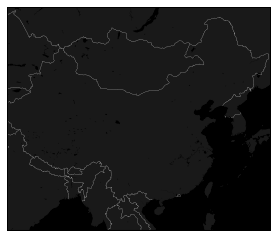

In [2]:
# Inspired by 
# https://www.kaggle.com/katacs/d/kaggle/climate-data-from-ocean-ships/captain-cook-s-travels/code
# and
# https://www.kaggle.com/beyondbeneath/talkingdata-mobile-user-demographics/geolocation-visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.basemap import Basemap
# %matplotlib inline

# Sample it down to only the China region
lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

events = pd.read_csv("data/events.csv")
# filter out those events triggered outside of China
events = events.query(
    "longitude <= %d & %d <= longitude & latitude <= %d & %d <= latitude" %
    (lon_max, lon_min, lat_max, lat_min)
)
events = events.sample(int(events.shape[0] * 0.5))
print(events.shape)

times = pd.DatetimeIndex(events['timestamp'])
time_groups = events.groupby(times.hour)

m = map = Basemap(
    projection='merc', 
    llcrnrlon=lon_min, 
    llcrnrlat=lat_min,
    urcrnrlon=lon_max, 
    urcrnrlat=lat_max,
    resolution='i')
m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

x,y = m(0, 0)
point = m.plot(x, y, 'o', markersize=2, c='#1292db', zorder=5)[0]
def init():
    point.set_data([], [])
    return point,

def animate(i):
    lon = time_groups.get_group(i)['longitude'].values
    lat = time_groups.get_group(i)['latitude'].values
    x, y = m(lon ,lat)
    point.set_data(x,y)
    plt.title('China at %2d:00' % (i))
    return point,

output = animation.FuncAnimation(plt.gcf(), animate, init_func=init, frames=24, interval=500, blit=True, repeat=False)
# output.save('one-day-in-china.gif', writer='imagemagick')
plt.show()